## Electrical Grid Stability Simulated Data Data Set


Stability of the Grid System

Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. 

### Problem Statement

We’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

#### Predictive features:

'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);

'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);

'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');


#### Dependent variables:

'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
'stabf': a categorical (binary) label ('stable' or 'unstable').

In [1]:
# importing the  required libaries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import sklearn.utils

In [2]:
# reading the datasets
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
# an overview of the 10 first datasets
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [4]:
# checking the dimensions of the data frame
print("The Shape is: ", df.shape)

The Shape is:  (10000, 14)


In [5]:
# checking for the data types
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [6]:
# summary statistics
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
# checking for missing values
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

There are no missing values in the dataset

In [8]:
# checking the distribution of Dependent variable stab
df.value_counts(["stab"])

stab     
-0.080760    1
 0.034934    1
 0.034883    1
 0.034884    1
 0.034896    1
            ..
-0.004154    1
-0.004145    1
-0.004137    1
-0.004133    1
 0.109403    1
Length: 10000, dtype: int64

In [9]:
# checking the distribution of Dependent variable stabf
df.value_counts(["stabf"])

stabf   
unstable    6380
stable      3620
dtype: int64

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise),
'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification)

In [10]:
# dropping the stab column
df.drop('stab', axis=1, inplace=True)

In [11]:
# an overview of the dataset after dropping the stab column
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [13]:
import sklearn.utils
from sklearn.preprocessing import LabelEncoder

# encoding categorical variable
df = sklearn.utils.shuffle(df)
encoder = LabelEncoder()
df['stabf'] = encoder.fit_transform(df['stabf'])
print(f"{'The stabf feature'} has {df['stabf'].unique()} unique values")

The stabf feature has [1 0] unique values


In [14]:
X = df.drop(columns= 'stabf' )
y = df[ 'stabf' ] 

In [15]:
# spliting the dataset into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )
y_train.value_counts()

1    5140
0    2860
Name: stabf, dtype: int64

From the value count operation, it shows that there is imbalance in the class distribution. For this, SMOTE will be used on the training data to handle it.

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1 )
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

y_balanced.value_counts()

0    5140
1    5140
Name: stabf, dtype: int64

After the  SMOTE operation, we can see that there is no imbalance in the class distribution.

In [17]:
# the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaler_x_train_balanced = scaler.fit_transform(x_train_balanced)
Scaler_x_test = scaler.transform(x_test)

### Question 19 -What is the accuracy on the test set using the random forest classifier in 4 decimal places.

Random forest

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rand_fst = RandomForestClassifier(random_state=1)

rand_fst.fit(Scaler_x_train_balanced, y_balanced)

RandomForestClassifier(random_state=1)

In [19]:
rand_fst_y = rand_fst.predict(Scaler_x_test)

In [20]:
# Cross-validation and accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rand_fst, Scaler_x_train_balanced, y_balanced, cv= 5 , scoring= 'f1_macro' )
scores 

array([0.92071833, 0.914876  , 0.93773942, 0.95861097, 0.95372545])

### Answer -The accuracy on the test set using the random forest classifier in 4 decimal places is 0.9207

In [21]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

# confusion matrix = cnf_mat
new_predictions = rand_fst.predict(Scaler_x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)
cnf_mat

array([[ 701,   59],
       [  93, 1147]], dtype=int64)

Extra Trees Classifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
ETC_model = ExtraTreesClassifier(random_state=1)
ETC_model.fit(Scaler_x_train_balanced, y_balanced)

ExtraTreesClassifier(random_state=1)

In [23]:
ETC_y = ETC_model.predict(Scaler_x_test)

In [24]:
# Cross-validation and accuracy
scores = cross_val_score(ETC_model, Scaler_x_train_balanced, y_balanced, cv= 5 , scoring= 'f1_macro' )
scores 

array([0.92898772, 0.93821892, 0.9464976 , 0.96249603, 0.96152468])

In [25]:
# confusion matrix
# confusion matrix = cnf_mat
new_predictions = ETC_model.predict(Scaler_x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)
cnf_mat

array([[ 685,   75],
       [  64, 1176]], dtype=int64)

### Question 14 -What is the accuracy on the test set using the XGboost classifier. In 4 decimal places?

 XGBOOST

In [26]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(Scaler_x_train_balanced, y_balanced)

c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
xgb_y = xgb_model.predict(Scaler_x_test)

In [28]:
# Cross-validation and accuracy
scores = cross_val_score(xgb_model, Scaler_x_train_balanced, y_balanced, cv= 5 , scoring= 'f1_macro' )
scores 

c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.94357544, 0.94308045, 0.96157543, 0.97469438, 0.9688468 ])

In [29]:
# confusion matrix
# confusion matrix = cnf_mat
new_predictions = xgb_model.predict(Scaler_x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)
cnf_mat

array([[ 715,   45],
       [  60, 1180]], dtype=int64)

### Answer -The accuracy on the test set using the XGboost classifier in 4 decimal places is 0.9435

### Question 5 -What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

Light Gradient Boosting Model

In [33]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(Scaler_x_train_balanced, y_balanced)

LGBMClassifier(random_state=1)

In [34]:
lgb_y = lgb_model.predict(Scaler_x_test)

In [36]:
# Cross-validation and accuracy
scores = cross_val_score(lgb_model, Scaler_x_train_balanced, y_balanced, cv= 5 , scoring= 'f1_macro' )
scores 

array([0.93628222, 0.93481991, 0.95525084, 0.9644649 , 0.96592028])

### Answer -The LGBM classifier in 4 decimal places is 0.9362

### Question 7 -Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

Feature Selection using ExtraTrees

In [40]:
classifier = ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=8, n_estimators=1000)

score = cross_val_score(classifier, X,y, cv=10)
score

array([0.915, 0.925, 0.921, 0.933, 0.942, 0.93 , 0.938, 0.925, 0.916,
       0.921])

In [41]:
score.mean()

0.9266

In [42]:
# training the model with x features and y target using the train dataset
classifier.fit(X, y)

# getting the feature importances using the fitted classifier object
feature_Selection = classifier.feature_importances_

In [43]:
# ExtraTreesClassifier hyparameter = ETC_y_hypar
ETC_y_hypar = classifier.predict(Scaler_x_test)

c:\Users\USER\Desktop\Hamoye\Hamoye_Winter_GroupProject\hamoye_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [44]:
#printing feature selection 
feature_Selection

array([0.13332369, 0.13423436, 0.12741211, 0.13180294, 0.01946212,
       0.0218212 , 0.02203949, 0.02166661, 0.09121748, 0.09748929,
       0.10482198, 0.09470873])

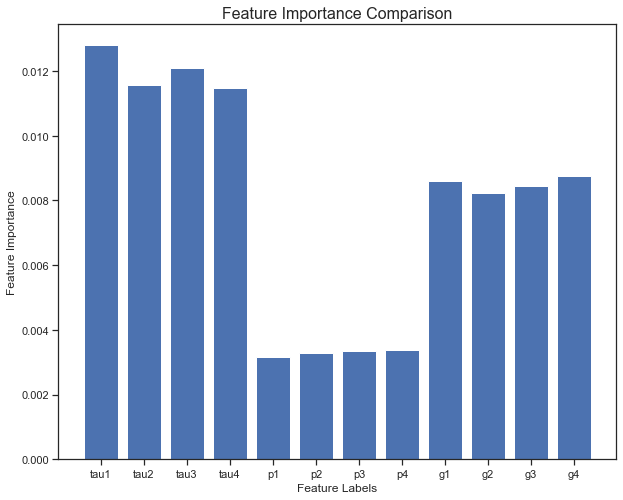

In [47]:
# Normalising each features 
normalized_feature_importance = np.std([tree.feature_importances_ for tree in 
                                        classifier.estimators_], 
                                        axis = 0)

plt.figure(figsize=(10,8))
plt.bar(X.columns, normalized_feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Comparison', size=16)
plt.show()

### Answer -From the graph, tau1 has the highest importance while p1 has the least importance